In [15]:
import torch

In [16]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [17]:
transform = transforms.ToTensor()

In [18]:
import os

In [19]:
os.getcwd()

'C:\\Users\\M1057101\\workspace\\deep_learning_with_pytorch'

In [20]:
train_data = datasets.MNIST(root = os.getcwd(), train = True,
                            download=True, transform= transform )

In [21]:
test_data = datasets.MNIST(root = os.getcwd(), train = False,
                           download=True, transform= transform )

In [22]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [23]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\M1057101\workspace\deep_learning_with_pytorch
    Split: Train
    StandardTransform
Transform: ToTensor()

In [24]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\M1057101\workspace\deep_learning_with_pytorch
    Split: Test
    StandardTransform
Transform: ToTensor()

In [25]:
image,label = train_data[3]

In [26]:
import matplotlib.pyplot as plt

In [27]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [28]:
image.shape

torch.Size([1, 28, 28])

In [29]:
label

1

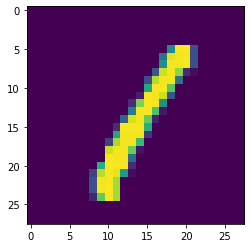

In [30]:
plt.imshow(image.reshape(28,28))

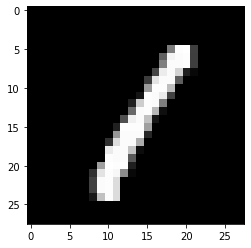

In [31]:
plt.imshow(image.reshape(28,28), cmap="gray")

In [32]:
torch.manual_seed(64)

In [33]:
60000/100

600.0

In [34]:
train_loaded = DataLoader(train_data, batch_size = 100, shuffle = True)

In [35]:
test_loaded = DataLoader(test_data, batch_size= 500, shuffle= False)

In [36]:
image.shape

torch.Size([1, 28, 28])

In [37]:
28*28*1

784

# Model Architecture

<img src = "mnist2.jpeg" width=350, height = 350>

### Softmax

<img src = "softmax2.png" width=350, height = 350>

<img src = "softmax.png" width=500, height = 500>

In [38]:
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784,120)
        self.fc2 = nn.Linear(120,80)
        self.fc3 = nn.Linear(80,10)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=1)
        return(x)
        
        

In [39]:
model = Model2()

In [40]:
model

Model2(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)

In [41]:
# SGD - Linear / Sequnetial
# ADAM - Clasification

In [42]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)

In [43]:

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loaded):
        b=b+1
        
        
        # Apply the model
        y_pred = model.forward(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr = trn_corr + batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%50 == 0:
            print(f'epoch: {i}  batch: {b}  loss: {loss.item():.4f}  \
accuracy: {trn_corr.item()*100/(100*b):.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loaded):
            

            # Apply the model
            y_val = model.forward(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_batch_corr = (predicted == y_test).sum()
            tst_corr = tst_corr + tst_batch_corr
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
          



epoch: 0  batch: 50  loss: 1.7046  accuracy: 60.800%
epoch: 0  batch: 100  loss: 1.7261  accuracy: 69.630%
epoch: 0  batch: 150  loss: 1.7306  accuracy: 73.273%
epoch: 0  batch: 200  loss: 1.6582  accuracy: 75.660%
epoch: 0  batch: 250  loss: 1.5252  accuracy: 77.716%
epoch: 0  batch: 300  loss: 1.5612  accuracy: 79.727%
epoch: 0  batch: 350  loss: 1.5885  accuracy: 81.131%
epoch: 0  batch: 400  loss: 1.6184  accuracy: 82.320%
epoch: 0  batch: 450  loss: 1.6029  accuracy: 83.107%
epoch: 0  batch: 500  loss: 1.5804  accuracy: 83.764%
epoch: 0  batch: 550  loss: 1.6083  accuracy: 84.296%
epoch: 0  batch: 600  loss: 1.5793  accuracy: 84.882%
epoch: 1  batch: 50  loss: 1.5745  accuracy: 91.500%
epoch: 1  batch: 100  loss: 1.5611  accuracy: 89.820%
epoch: 1  batch: 150  loss: 1.5445  accuracy: 90.167%
epoch: 1  batch: 200  loss: 1.5447  accuracy: 90.300%
epoch: 1  batch: 250  loss: 1.5257  accuracy: 90.524%
epoch: 1  batch: 300  loss: 1.5200  accuracy: 90.730%
epoch: 1  batch: 350  loss: 1.

In [44]:
100, 28*28*1

(100, 784)

In [45]:
X_train.shape

torch.Size([100, 1, 28, 28])

In [46]:
100,1,28,28

(100, 1, 28, 28)

In [47]:
y_val[3]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [50]:
list1 = torch.max(y_val,1)[1]


In [51]:
for b, items in enumerate(list1):
    print(b,items)

0 tensor(7)
1 tensor(3)
2 tensor(4)
3 tensor(5)
4 tensor(6)
5 tensor(7)
6 tensor(8)
7 tensor(9)
8 tensor(7)
9 tensor(1)
10 tensor(2)
11 tensor(3)
12 tensor(4)
13 tensor(5)
14 tensor(6)
15 tensor(7)
16 tensor(8)
17 tensor(9)
18 tensor(1)
19 tensor(0)
20 tensor(1)
21 tensor(2)
22 tensor(7)
23 tensor(5)
24 tensor(3)
25 tensor(4)
26 tensor(4)
27 tensor(0)
28 tensor(0)
29 tensor(6)
30 tensor(9)
31 tensor(6)
32 tensor(6)
33 tensor(5)
34 tensor(7)
35 tensor(2)
36 tensor(3)
37 tensor(4)
38 tensor(4)
39 tensor(9)
40 tensor(1)
41 tensor(4)
42 tensor(0)
43 tensor(7)
44 tensor(7)
45 tensor(5)
46 tensor(7)
47 tensor(2)
48 tensor(3)
49 tensor(1)
50 tensor(4)
51 tensor(4)
52 tensor(0)
53 tensor(9)
54 tensor(7)
55 tensor(6)
56 tensor(1)
57 tensor(8)
58 tensor(3)
59 tensor(3)
60 tensor(7)
61 tensor(3)
62 tensor(9)
63 tensor(8)
64 tensor(8)
65 tensor(4)
66 tensor(7)
67 tensor(7)
68 tensor(6)
69 tensor(2)
70 tensor(1)
71 tensor(9)
72 tensor(8)
73 tensor(7)
74 tensor(8)
75 tensor(8)
76 tensor(7)
77 tensor

..\aten\src\ATen\native\BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


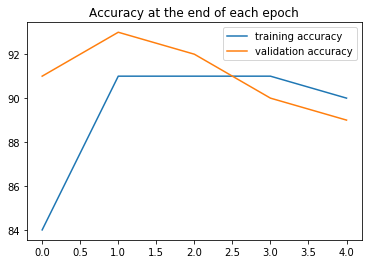

In [52]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [53]:
images,lables = train_data[0]

In [54]:
y2 =model.forward(images.view(-1,784))

In [55]:
y2

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], grad_fn=<SoftmaxBackward>)

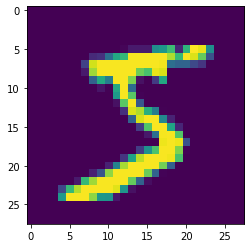

In [56]:
plt.imshow(images.reshape(28,28))

In [57]:
torch.max(y2.data,1)[1]

tensor([5])

In [58]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_loaded:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 8957/10000 =  89.570%


In [59]:
# print a row of values for reference
import numpy as np
from sklearn.metrics import confusion_matrix
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[  48    0    7    2    2    3    1    0    0    0]
 [   0   58    0    0    0    0    0    0    0    0]
 [   0    0   21    0    0    0    0    0    0    0]
 [   0    0    2   45    0    1    0    0    0    0]
 [   0    0    0    0   41    0    0    0    0    2]
 [   0    0    0    0    0   31    0    0    1    1]
 [   0    0    0    0    3    4   47    0    0    0]
 [   2    1    6    2    3    1    0   59    1   14]
 [   0    1   12    3    1    1    1    0   46    0]
 [   0    0    0    0    0    0    0    0    0   26]]


In [60]:
# To Do

In [64]:
# 1) Download CIFAR dataset
train_data = datasets.CIFAR10(root='./Data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./Data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [62]:
# 2) Solve an MNIST problem for other language and share ur results in the chat - kaggle

In [63]:
# 3) Compare the MNIST problem dataset solved with keras and compare the code to understand 
# the key differences in Pytorch and Keras